# Classification and Regression, from linear and logistic regression to neural networks

### Author : Sofianos Lampropoulos

The main aim of this project is to study both classification and
regression problems by developing our own feed-forward neural network (FFNN) code. 



* Regression (fitting a continuous function) 

In this part we use Regression to approximate (fit) a continuous function. For this exercise we will generate a dataset for a function
$\mathrm{FrankeFunction}(x,y)$ with $x,y \in [0,1]$. The function
$f(x,y)$ is the Franke function. We explore also the addition
of an added stochastic noise to this function using the normal
distribution $N(0,1)$. 

The Franke function is described bellow:

 \begin{align*}
f(x,y) &= \frac{3}{4}\exp{\left(-\frac{(9x-2)^2}{4} - \frac{(9y-2)^2}{4}\right)}+\frac{3}{4}\exp{\left(-\frac{(9x+1)^2}{49}- \frac{(9y+1)}{10}\right)} \\
&+\frac{1}{2}\exp{\left(-\frac{(9x-7)^2}{4} - \frac{(9y-3)^2}{4}\right)} -\frac{1}{5}\exp{\left(-(9x-4)^2 - (9y-7)^2\right) }.
\end{align*}





* Classification 

Here we will also develop a Logistic regression code that you will use to compare with the Neural Network code. The data set we propose are the so-called [Wisconsin Breat Cancer Data](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) data set of images representing various features of tumors.  A longer explanation with links to the scientific literature can be found at the [Machine Learning repository of the University of California at Irvine](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29). Feel free to consult this site and the pertinent  literature.

You can find more information about this at the [Scikit-Learn site](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) or at the [University of California at Irvine](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)). 

The University of California at Irvine with its Machine Learning repository at <https://archive.ics.uci.edu/ml/index.php> is an excellent site to look up for examples and inspiration. [Kaggle.com](https://www.kaggle.com/) is an equally interesting site. Feel free to explore these sites.


# REGRESSION

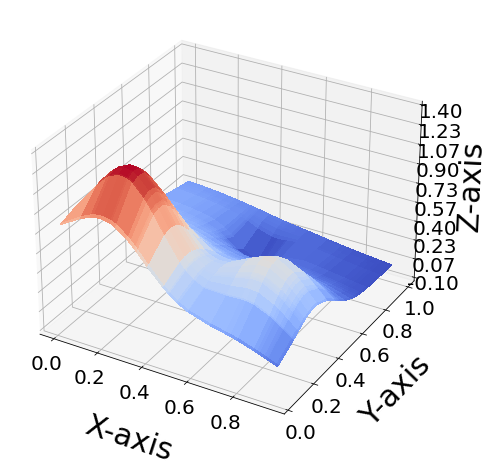

In [ ]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from random import random, seed
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

def xy_data(n):
    x = np.sort(np.random.uniform(0, 1, n))
    y = np.sort(np.random.uniform(0, 1, n))
    x,y = np.meshgrid(x,y)
    return x,y

x,y = xy_data(40)
z = FrankeFunction(x,y)

fig = plt.figure(figsize=(20,8))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(x,y,z,cmap=cm.coolwarm, linewidth = 0, antialiased=False)
ax.set_zlim(-0.10,1.40)
ax.set_xlabel('X-axis', fontsize=30)
ax.set_ylabel('Y-axis', fontsize=30)
ax.set_zlabel('Z-axis', fontsize=30)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 25
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='z', labelsize=20)

In [ ]:
def FrankeFunction_noisy(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    noise = np.random.normal(0, 0.1, len(x)*len(x)) 
    noise = noise.reshape(len(x),len(x))
    return term1 + term2 + term3 + term4 + noise

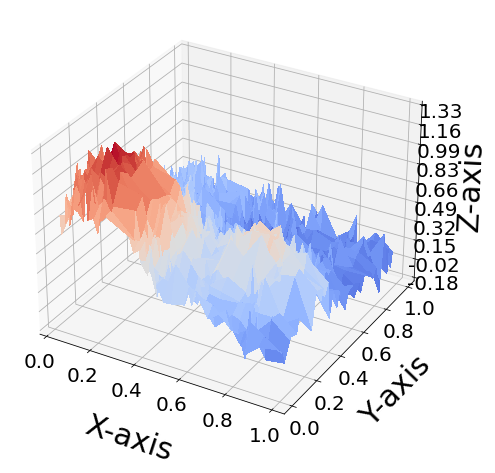

In [ ]:
x,y = xy_data(40)
z_noise = FrankeFunction_noisy(x,y)
fig = plt.figure(figsize=(20,8))
ax = fig.gca(projection ='3d')
surf = ax.plot_surface(x,y,z_noise,cmap=cm.coolwarm, linewidth = 0, antialiased=False)
#ax.set_zlim(-0.10,1.40)
ax.set_xlabel('X-axis', fontsize=30)
ax.set_ylabel('Y-axis', fontsize=30)
ax.set_zlabel('Z-axis', fontsize=30)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.zaxis.labelpad = 12
ax.xaxis.labelpad = 25
ax.yaxis.labelpad = 20
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='z', labelsize=20)

In [ ]:
from sklearn.linear_model import Ridge,SGDRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

x,y = xy_data(40)

# Stacking x and y and split data into test and train
x_and_y=np.hstack((x.ravel().reshape(x.ravel().shape[0],1),y.ravel().reshape(y.ravel().shape[0],1)))

x_and_y_train, x_and_y_test, z_train, z_test = train_test_split(x_and_y,z.ravel(),test_size=0.3, shuffle=True)

# Instantiate individual regressors
lr = LinearRegression()

dt = DecisionTreeRegressor(min_samples_leaf=0.13)

sgd = SGDRegressor()
gbt = GradientBoostingRegressor(n_estimators=300, max_depth=4)


Regressors = [('Linear Regression', lr), ('Gradient Boosting Regressor', gbt), ('Decision Tree', dt),('SGD Regressor', sgd)]

for reg_name, reg in Regressors:
  
  #fit reg to the training set
  reg.fit(x_and_y_train, z_train)
  
  # Predict the values of the test set
  z_pred = reg.predict(x_and_y_test)
  
  # Evaluate the accuracy of reg on the test set
  print('{:s} : {:.3f}'.format(reg_name, r2_score(z_test, z_pred)))

Linear Regression : 0.769
Gradient Boosting Regressor : 1.000
Decision Tree : 0.879
SGD Regressor : 0.613


In [ ]:
x,y = xy_data(40)
z = FrankeFunction_noisy(x,y)

# Stacking x and y and split data into test and train
x_and_y=np.hstack((x.ravel().reshape(x.ravel().shape[0],1),y.ravel().reshape(y.ravel().shape[0],1)))

x_and_y_train, x_and_y_test, z_train, z_test = train_test_split(x_and_y,z.ravel(),test_size=0.2, shuffle=True)

for reg_name, reg in Regressors:
  
  #fit reg to the training set
  reg.fit(x_and_y_train, z_train)
  
  # Predict the values of the test set
  z_pred = reg.predict(x_and_y_test)
  
  # Evaluate the accuracy of reg on the test set
  print('{:s} : {:.3f}'.format(reg_name, r2_score(z_test, z_pred)))

Linear Regression : 0.656
Gradient Boosting Regressor : 0.885
Decision Tree : 0.803
SGD Regressor : 0.576


### Part a): Write your own Stochastic Gradient Descent  code, first step

In order to get started, you will now replace in your standard ordinary
least squares (OLS) and Ridge regression codes (see previous labs) the matrix inversion
algorithm with your own SGD code. You can choose whether you want to
add the momentum SGD optionality or other SGD variants such as RMSprop
or ADAgrad or ADAM.

Perform an analysis of the results for OLS and Ridge regression as
function of the chosen learning rates, the number of mini-batches and
epochs as well as algorithm for scaling the learning rate. You can
also compare your own results with those that can be obtained using
for example **Scikit-Learn**'s various SGD options.  Discuss your
results. For Ridge regression you need now to study the results as functions of  the hyper-parameter $\lambda$ and 
the learning rate $\eta$.  Discuss your results.

You will need your SGD code for the setup of the Neural Network and Logistic Regression codes. You will find the Python [Seaborn package](https://seaborn.pydata.org/generated/seaborn.heatmap.html) useful when plotting the results as function of the learning rate $\eta$ and the hyper-parameter $\lambda$ when you use Ridge regression.

In [ ]:
def sgd(gradient, x, y, start, learn_rate=0.1, decay_rate=0.0, batch_size=1,
    n_iter=50, tolerance=1e-06, dtype="float64", random_state=None):
    # Checking if the gradient is callable
    if not callable(gradient):
        raise TypeError("'gradient' must be callable")

    # Setting up the data type for NumPy arrays
    dtype_ = np.dtype(dtype)

    # Converting x and y to NumPy arrays
    x, y = np.array(x, dtype=dtype_), np.array(y, dtype=dtype_)
    n_obs = x.shape[0]
    if n_obs != y.shape[0]:
        raise ValueError("'x' and 'y' lengths do not match")
    xy = np.c_[x.reshape(n_obs, -1), y.reshape(n_obs, 1)]

    # Initializing the random number generator
    seed = None if random_state is None else int(random_state)
    rng = np.random.default_rng(seed=seed)

    # Initializing the values of the variables
    vector = np.array(start, dtype=dtype_)

    # Setting up and checking the learning rate
    learn_rate = np.array(learn_rate, dtype=dtype_)
    if np.any(learn_rate <= 0):
        raise ValueError("'learn_rate' must be greater than zero")

    # Setting up and checking the decay rate
    decay_rate = np.array(decay_rate, dtype=dtype_)
    if np.any(decay_rate < 0) or np.any(decay_rate > 1):
        raise ValueError("'decay_rate' must be between zero and one")

    # Setting up and checking the size of minibatches
    batch_size = int(batch_size)
    if not 0 < batch_size <= n_obs:
        raise ValueError(
            "'batch_size' must be greater than zero and less than "
            "or equal to the number of observations"
        )

    # Setting up and checking the maximal number of iterations
    n_iter = int(n_iter)
    if n_iter <= 0:
        raise ValueError("'n_iter' must be greater than zero")

    # Setting up and checking the tolerance
    tolerance = np.array(tolerance, dtype=dtype_)
    if np.any(tolerance <= 0):
        raise ValueError("'tolerance' must be greater than zero")

    # Setting the difference to zero for the first iteration
    diff = 0

    # Performing the gradient descent loop
    for _ in range(n_iter):
        # Shuffle x and y
        rng.shuffle(xy)

        # Performing minibatch moves
        for start in range(0, n_obs, batch_size):
            stop = start + batch_size
            x_batch, y_batch = xy[start:stop, :-1], xy[start:stop, -1:]

            # Recalculating the difference
            grad = np.array(gradient(x_batch, y_batch, vector), dtype_)
            diff = decay_rate * diff - learn_rate * grad

            # Checking if the absolute difference is small enough
            if np.all(np.abs(diff) <= tolerance):
                break

            # Updating the values of the variables
            vector += diff

    return vector if vector.shape else vector.item()

In [ ]:
def ssr_gradient(x, y, b):
    res = b[0] + b[1] * x - y
    return res.mean(), (res * x).mean()

In [ ]:
def predict(x,b0,b1):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(b1,x[i])+b0)
        y_pred.append(y)
    return np.array(y_pred)

In [ ]:
regression_coeffs = dict() # Store regression coefficients from each model in a dictionary

regression_coeffs['OLS'] = [np.nan]*2 # Initialize to NaN
regression_coeffs[r'Ridge $\lambda = 0$'] = [np.nan]*2

dfResults = pd.DataFrame(regression_coeffs) # Create dataframe

dfResults.rename({0: r'$\beta_{0}$', 1: r'$\beta_{1}$'}, inplace=True) # Rename rows
dfResults

,OLS,Ridge $\lambda = 0$
$\beta_{0}$,NaN,NaN
$\beta_{1}$,NaN,NaN


In [ ]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=1, n_informative=5, random_state=1)
pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)

,0,0
0,-1.444114,-116.555176
1,-0.845206,-68.216986
2,0.042214,3.407093
3,-0.611756,-49.375178
4,0.885141,71.440203
...,...,...
95,-0.687173,-55.462066
96,-0.208894,-16.859962
97,0.120159,9.698091
98,0.410052,33.095481


We start with OLS regression

In [ ]:
simp_reg = sgd(ssr_gradient, X, y, start=[0.1, 0.1], learn_rate=0.01,n_iter=100)

# save the beta coefficients
beta0_sreg = simp_reg[0]
beta1_sreg = simp_reg[1]

dfResults['OLS'][:] = [beta0_sreg, beta1_sreg]
dfResults

,OLS,Ridge $\lambda = 0$
$\beta_{0}$,0.000008,NaN
$\beta_{1}$,80.710403,NaN


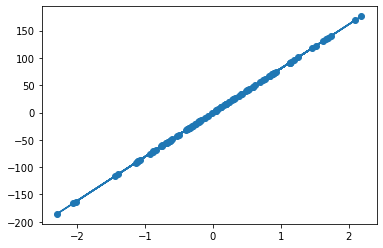

In [ ]:
plt.scatter(X,y)
plt.plot(X,beta0_sreg + beta1_sreg*X)

In [ ]:
print(r2_score(predict(X,beta0_sreg,beta1_sreg),y))

0.9999999999979002


In [ ]:
batches = [1,3,5]
rates = [0.0001,0.001,0.01,0.1]
epochs = [10,100,1000,10000]

For Batch size =  1 , for Learning Rate =  0.0001 , for epochs =  10


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,0.537299,NaN
$\beta_{1}$,6.201185,NaN


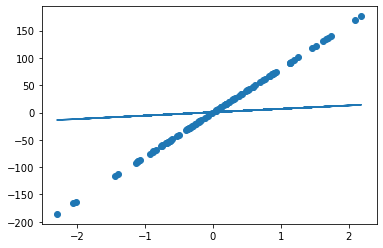

For Batch size =  3 , for Learning Rate =  0.0001 , for epochs =  10


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,0.263676,NaN
$\beta_{1}$,2.205464,NaN


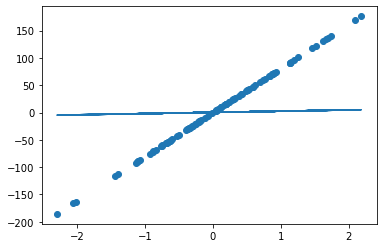

For Batch size =  5 , for Learning Rate =  0.0001 , for epochs =  10


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,0.193963,NaN
$\beta_{1}$,1.359056,NaN


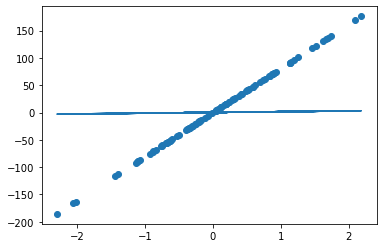

For Batch size =  1 , for Learning Rate =  0.001 , for epochs =  10


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,2.030766,NaN
$\beta_{1}$,44.005220,NaN


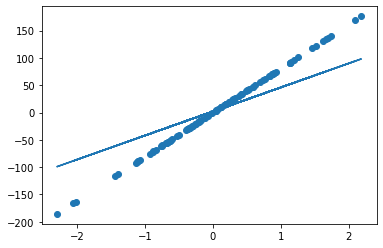

For Batch size =  3 , for Learning Rate =  0.001 , for epochs =  10


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,1.502815,NaN
$\beta_{1}$,19.251669,NaN


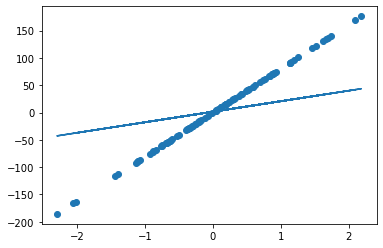

For Batch size =  5 , for Learning Rate =  0.001 , for epochs =  10


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,0.899872,NaN
$\beta_{1}$,11.843249,NaN


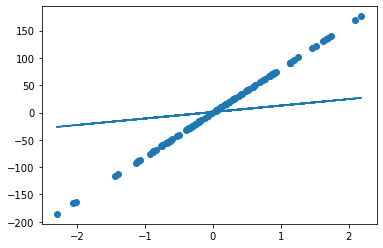

For Batch size =  1 , for Learning Rate =  0.01 , for epochs =  10


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,0.010229,NaN
$\beta_{1}$,80.661121,NaN


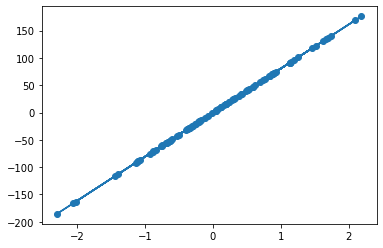

For Batch size =  3 , for Learning Rate =  0.01 , for epochs =  10


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,0.878808,NaN
$\beta_{1}$,74.999173,NaN


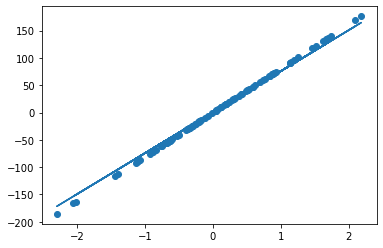

For Batch size =  5 , for Learning Rate =  0.01 , for epochs =  10


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,1.668023,NaN
$\beta_{1}$,64.071029,NaN


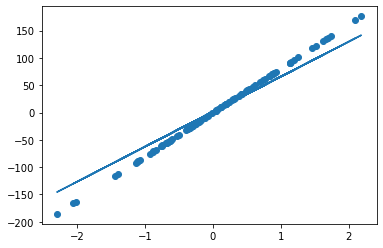

For Batch size =  1 , for Learning Rate =  0.1 , for epochs =  10


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,-0.000006,NaN
$\beta_{1}$,80.710509,NaN


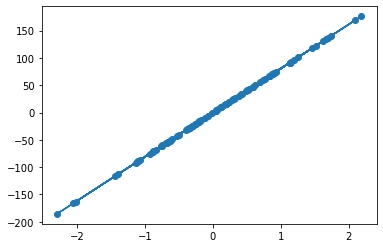

For Batch size =  3 , for Learning Rate =  0.1 , for epochs =  10


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,0.000007,NaN
$\beta_{1}$,80.710511,NaN


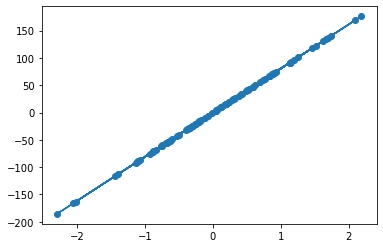

For Batch size =  5 , for Learning Rate =  0.1 , for epochs =  10


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,0.000006,NaN
$\beta_{1}$,80.710499,NaN


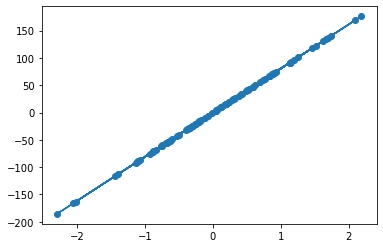

For Batch size =  1 , for Learning Rate =  0.0001 , for epochs =  100


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,2.047634,NaN
$\beta_{1}$,43.773865,NaN


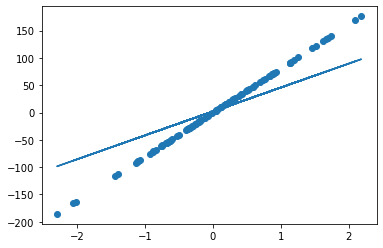

For Batch size =  3 , for Learning Rate =  0.0001 , for epochs =  100


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,1.310183,NaN
$\beta_{1}$,19.103646,NaN


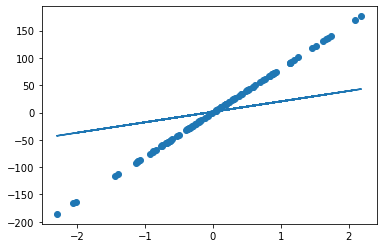

For Batch size =  5 , for Learning Rate =  0.0001 , for epochs =  100


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,0.898907,NaN
$\beta_{1}$,11.836995,NaN


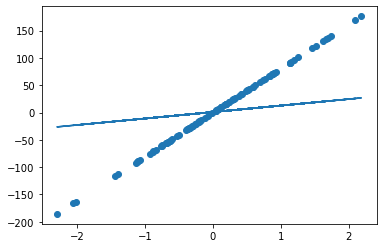

For Batch size =  1 , for Learning Rate =  0.001 , for epochs =  100


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,0.025548,NaN
$\beta_{1}$,80.597948,NaN


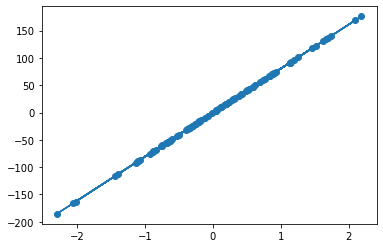

For Batch size =  3 , for Learning Rate =  0.001 , for epochs =  100


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,0.845257,NaN
$\beta_{1}$,75.047896,NaN


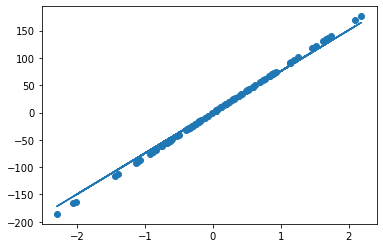

For Batch size =  5 , for Learning Rate =  0.001 , for epochs =  100


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,1.665115,NaN
$\beta_{1}$,63.920383,NaN


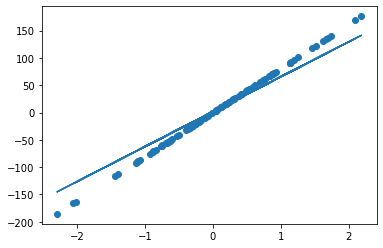

For Batch size =  1 , for Learning Rate =  0.01 , for epochs =  100


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,0.000036,NaN
$\beta_{1}$,80.710378,NaN


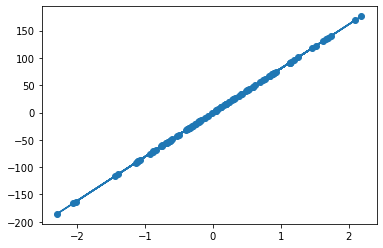

For Batch size =  3 , for Learning Rate =  0.01 , for epochs =  100


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,0.000049,NaN
$\beta_{1}$,80.710388,NaN


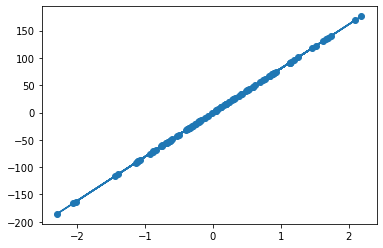

For Batch size =  5 , for Learning Rate =  0.01 , for epochs =  100


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,0.000047,NaN
$\beta_{1}$,80.710316,NaN


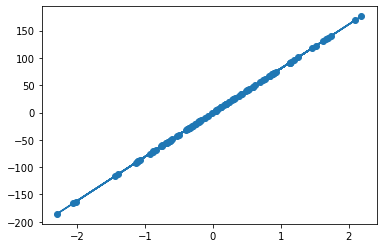

For Batch size =  1 , for Learning Rate =  0.1 , for epochs =  100


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,-3.684116e-07,NaN
$\beta_{1}$,8.071052e+01,NaN


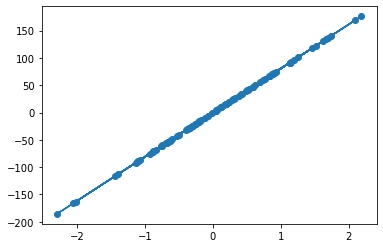

For Batch size =  3 , for Learning Rate =  0.1 , for epochs =  100


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,0.000002,NaN
$\beta_{1}$,80.710516,NaN


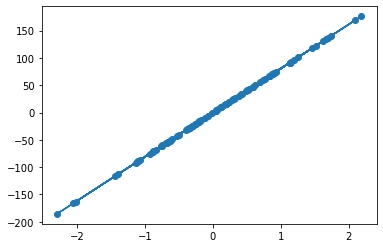

For Batch size =  5 , for Learning Rate =  0.1 , for epochs =  100


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,0.000001,NaN
$\beta_{1}$,80.710516,NaN


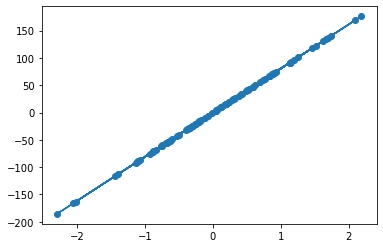

For Batch size =  1 , for Learning Rate =  0.0001 , for epochs =  1000


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,0.155514,NaN
$\beta_{1}$,79.899987,NaN


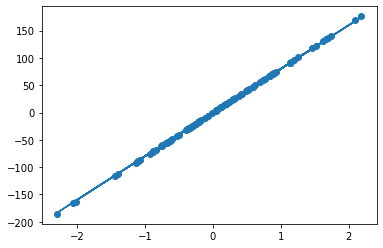

For Batch size =  3 , for Learning Rate =  0.0001 , for epochs =  1000


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,0.824686,NaN
$\beta_{1}$,75.079155,NaN


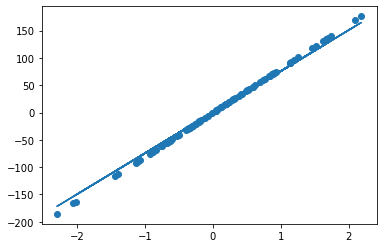

For Batch size =  5 , for Learning Rate =  0.0001 , for epochs =  1000


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,1.665398,NaN
$\beta_{1}$,63.905199,NaN


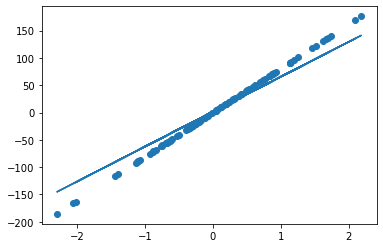

For Batch size =  1 , for Learning Rate =  0.001 , for epochs =  1000


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,0.000279,NaN
$\beta_{1}$,80.709276,NaN


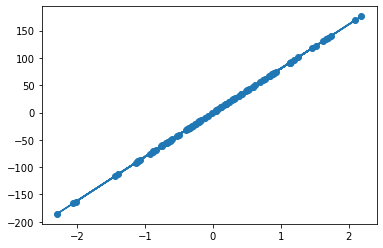

For Batch size =  3 , for Learning Rate =  0.001 , for epochs =  1000


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,0.000349,NaN
$\beta_{1}$,80.709241,NaN


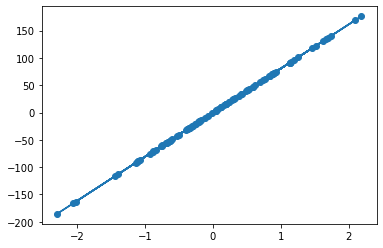

For Batch size =  5 , for Learning Rate =  0.001 , for epochs =  1000


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,0.000426,NaN
$\beta_{1}$,80.708968,NaN


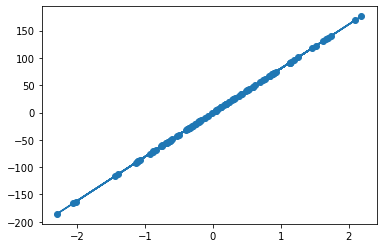

For Batch size =  1 , for Learning Rate =  0.01 , for epochs =  1000


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,0.000010,NaN
$\beta_{1}$,80.710504,NaN


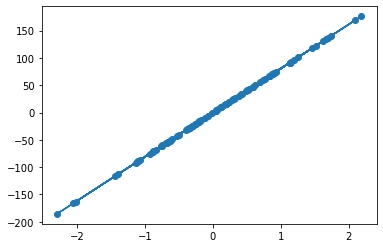

For Batch size =  3 , for Learning Rate =  0.01 , for epochs =  1000


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,0.000013,NaN
$\beta_{1}$,80.710489,NaN


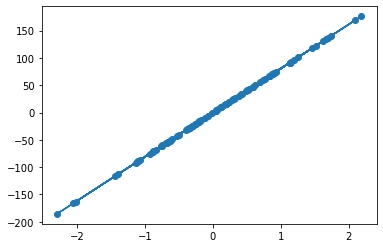

For Batch size =  5 , for Learning Rate =  0.01 , for epochs =  1000


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,0.000011,NaN
$\beta_{1}$,80.710477,NaN


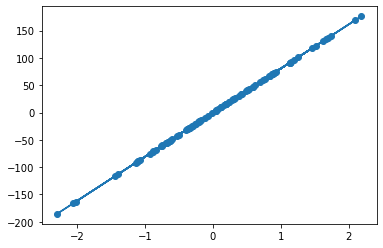

For Batch size =  1 , for Learning Rate =  0.1 , for epochs =  1000


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,0.000003,NaN
$\beta_{1}$,80.710519,NaN


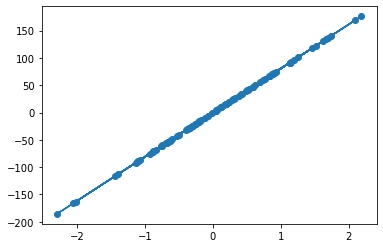

For Batch size =  3 , for Learning Rate =  0.1 , for epochs =  1000


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,0.000002,NaN
$\beta_{1}$,80.710518,NaN


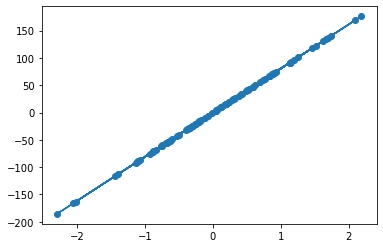

For Batch size =  5 , for Learning Rate =  0.1 , for epochs =  1000


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,-7.983871e-08,NaN
$\beta_{1}$,8.071052e+01,NaN


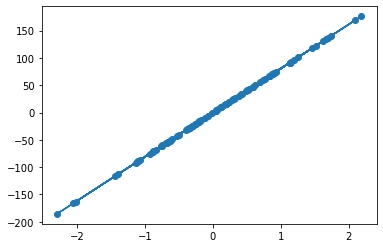

For Batch size =  1 , for Learning Rate =  0.0001 , for epochs =  10000


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,0.003419,NaN
$\beta_{1}$,80.696675,NaN


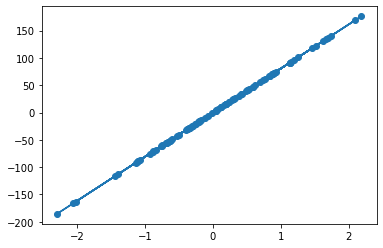

For Batch size =  3 , for Learning Rate =  0.0001 , for epochs =  10000


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,0.003426,NaN
$\beta_{1}$,80.698261,NaN


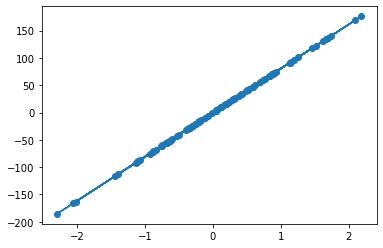

For Batch size =  5 , for Learning Rate =  0.0001 , for epochs =  10000


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,0.003598,NaN
$\beta_{1}$,80.696937,NaN


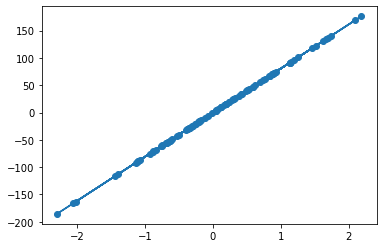

For Batch size =  1 , for Learning Rate =  0.001 , for epochs =  10000


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,0.000104,NaN
$\beta_{1}$,80.710370,NaN


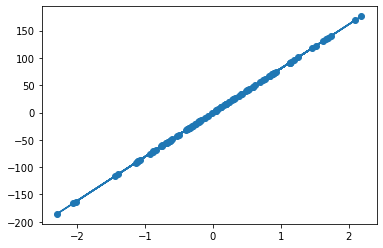

For Batch size =  3 , for Learning Rate =  0.001 , for epochs =  10000


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,0.000124,NaN
$\beta_{1}$,80.710174,NaN


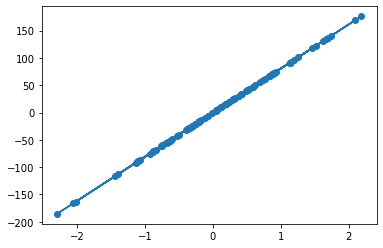

For Batch size =  5 , for Learning Rate =  0.001 , for epochs =  10000


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,0.000155,NaN
$\beta_{1}$,80.710085,NaN


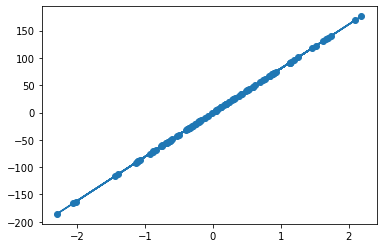

For Batch size =  1 , for Learning Rate =  0.01 , for epochs =  10000


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,0.000016,NaN
$\beta_{1}$,80.710508,NaN


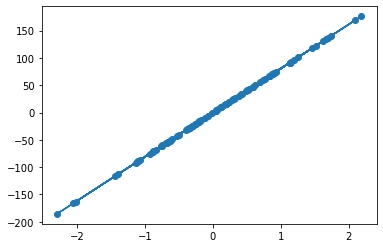

For Batch size =  3 , for Learning Rate =  0.01 , for epochs =  10000


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,0.000008,NaN
$\beta_{1}$,80.710497,NaN


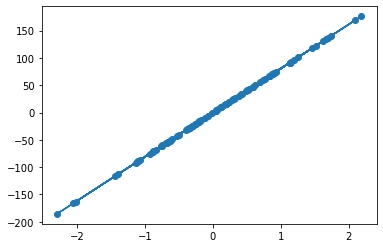

For Batch size =  5 , for Learning Rate =  0.01 , for epochs =  10000


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,0.000013,NaN
$\beta_{1}$,80.710487,NaN


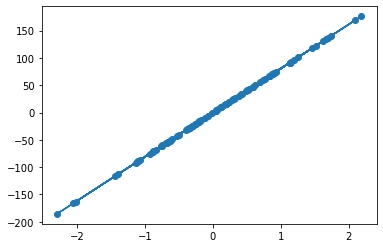

For Batch size =  1 , for Learning Rate =  0.1 , for epochs =  10000


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,5.452427e-07,NaN
$\beta_{1}$,8.071052e+01,NaN


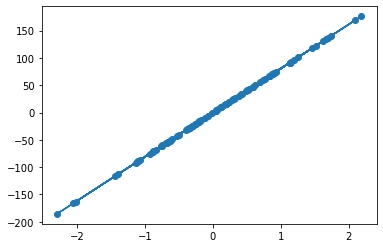

For Batch size =  3 , for Learning Rate =  0.1 , for epochs =  10000


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,3.622088e-07,NaN
$\beta_{1}$,8.071052e+01,NaN


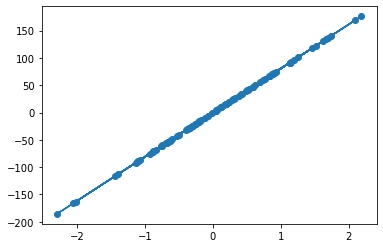

For Batch size =  5 , for Learning Rate =  0.1 , for epochs =  10000


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,9.497723e-07,NaN
$\beta_{1}$,8.071052e+01,NaN


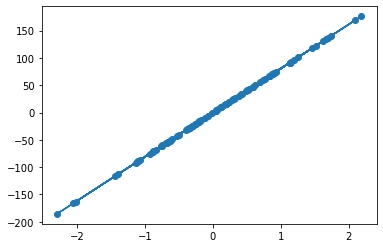

In [ ]:
for k in epochs:
    
    for n in rates:
        
        for i in batches:
            
            simp_reg = sgd(ssr_gradient, X, y, start=[0.1, 0.1], learn_rate=n,n_iter=k,batch_size = i)
            # save the beta coefficients
            beta0_sreg = simp_reg[0]
            beta1_sreg = simp_reg[1]
            
            print('For Batch size = ',i,', for Learning Rate = ',n,', for epochs = ',k)
            dfResults['OLS'][:] = [beta0_sreg, beta1_sreg]
            display(dfResults)
            plt.scatter(X,y)
            plt.plot(X,beta0_sreg + beta1_sreg*X)
            plt.show()

Now, we make a comparison between Ridge and OLS  

In [ ]:
ridge_reg = Ridge(alpha = 0,solver = 'sag') # build the ridge regression model with specified lambda, i.e. alpha

ridge_reg.fit(X, y) # fit the model to training data

# save the beta coefficients
beta0_ridge = ridge_reg.intercept_
beta1_ridge = ridge_reg.coef_[0]

ypredict_ridge = ridge_reg.predict(x.reshape(-1,1)) # make predictions everywhere

dfResults[r'Ridge $\lambda = 0$'][:] = [beta0_ridge, beta1_ridge]
dfResults

,OLS,Ridge $\lambda = 0$
$\beta_{0}$,9.497723e-07,-0.002588
$\beta_{1}$,8.071052e+01,80.753238


As we expected Ridge and OLS share the same coefs if Ridge's hypermater 'λ' has value 0

## Hyper parameter Tuning (Ridge)

In [ ]:
from sklearn.model_selection import GridSearchCV
est = Ridge()
list_of_lambdas = [1e-8, 1e-6, 1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 1e-2, 1e-1, 1.0]
parameters = {'alpha': list_of_lambdas}
gs = GridSearchCV(est, param_grid=parameters, cv= 4, scoring='r2')
fitmodel = gs.fit(X, y)


print(fitmodel.best_params_, "\n")
print(fitmodel.best_score_, "\n")
dfResults

{'alpha': 1e-08} 

1.0 



,OLS,Ridge $\lambda = 0$
$\beta_{0}$,9.497723e-07,-0.002588
$\beta_{1}$,8.071052e+01,80.753238


### Part b): Writing your own Neural Network code

Your aim now, and this is the central part of this project, is to
write your own Feed Forward Neural Network  code implementing the back
propagation algorithm discussed in the lecture slides.

You will focus on a regression problem first and study  the
Franke function. Discuss again your choice of cost function.

Write an FFNN code for regression with a flexible number of hidden
layers and nodes using the Sigmoid function as activation function for
the hidden layers. Initialize the weights using a normal
distribution. How would you initialize the biases? And which
activation function would you select for the final output layer?

Train your network and compare the results with those from your OLS and Ridge Regression codes from previous labs and projects. You should test your results against a similar code using **Scikit-Learn**  or **tensorflow/keras**. 

Comment your results and give a critical discussion of the results
obtained with the Linear  Regression code and your own Neural Network
code.  
Make an analysis of the regularization parameters and the learning rates employed to find the optimal MSE and $R2$ scores.

A useful reference on the back propagation algorithm is [Nielsen's
book](http://neuralnetworksanddeeplearning.com/). It is an excellent
read.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Activation Functions
def tanh(x):
    return np.tanh(x)

def d_tanh(x):
    return 1 - np.square(np.tanh(x))

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def d_sigmoid(x):
    return (1 - sigmoid(x)) * sigmoid(x)

def leaky_relu(x):
    return np.maximum(0,x) + 0.01*np.minimum(0,x)

def leaky_Relu_Derivative(x):    
    dx = np.ones_like(x)
    dx[x < 0] = 0.01
    return dx
        
def ReLU(x):
    return np.maximum(0,x)

def dReLU(x):
    dx = np.ones_like(x)
    dx[x < 0] = 0
    return dx

In [ ]:
def initialize_params(layer_sizes):
    params = {}
    for i in range(1, len(layer_sizes)):
        params['W' + str(i)] = np.random.randn(layer_sizes[i], layer_sizes[i-1])*0.01
        params['B' + str(i)] = np.random.randn(layer_sizes[i],1)*0.01
    return params

def forward_propagation(X_train, params,acf):
    layers = len(params)//2
    values = {}
    for i in range(1, layers+1):
        if i==1:
            values['Z' + str(i)] = np.dot(params['W' + str(i)], X_train) + params['B' + str(i)]
            values['A' + str(i)] = acf(values['Z' + str(i)])
        else:
            values['Z' + str(i)] = np.dot(params['W' + str(i)], values['A' + str(i-1)]) + params['B' + str(i)]
            if i==layers:
                values['A' + str(i)] = values['Z' + str(i)]
            else:
                values['A' + str(i)] = acf(values['Z' + str(i)])
    return values

def compute_cost(values, Y_train):
    layers = len(values)//2
    Y_pred = values['A' + str(layers)]
    cost = 1/(2*len(Y_train)) * np.sum(np.square(Y_pred - Y_train))
    return cost

def backward_propagation(params, values, X_train, Y_train):
    layers = len(params)//2
    m = len(Y_train)
    grads = {}
    for i in range(layers,0,-1):
        if i==layers:
            dA = 1/m * (values['A' + str(i)] - Y_train)
            dZ = dA
        else:
            dA = np.dot(params['W' + str(i+1)].T, dZ)
            dZ = np.multiply(dA, np.where(values['A' + str(i)]>=0, 1, 0))
        if i==1:
            grads['W' + str(i)] = 1/m * np.dot(dZ, X_train.T)
            grads['B' + str(i)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
        else:
            grads['W' + str(i)] = 1/m * np.dot(dZ,values['A' + str(i-1)].T)
            grads['B' + str(i)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
    return grads

def update_params(params, grads, learning_rate):
    layers = len(params)//2
    params_updated = {}
    for i in range(1,layers+1):
        params_updated['W' + str(i)] = params['W' + str(i)] - learning_rate * grads['W' + str(i)]
        params_updated['B' + str(i)] = params['B' + str(i)] - learning_rate * grads['B' + str(i)]
    return params_updated

def model(X_train, Y_train, layer_sizes, num_iters, learning_rate,acf):
    params = initialize_params(layer_sizes)
    for i in range(num_iters):
        values = forward_propagation(X_train.T, params,acf)
        cost = compute_cost(values, Y_train.T)
        grads = backward_propagation(params, values,X_train.T, Y_train.T)
        params = update_params(params, grads, learning_rate)
        print('Cost at iteration ' + str(i+1) + ' = ' + str(cost) + '\n')
    return params

def compute_accuracy(X_train, X_test, Y_train, Y_test, params,acf):
    values_train = forward_propagation(X_train.T, params,acf)
    values_test = forward_propagation(X_test.T, params,acf)
    train_acc = mean_squared_error(Y_train, values_train['A' + str(len(layer_sizes)-1)].T)
    test_acc = mean_squared_error(Y_test, values_test['A' + str(len(layer_sizes)-1)].T)
    return train_acc, test_acc

def predict(X, params,acf):
    values = forward_propagation(X.T, params,acf)
    predictions = values['A' + str(len(values)//2)].T
    return predictions

In [ ]:
from sklearn import datasets
from sklearn.metrics import mean_squared_error

from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=1, n_informative=5, random_state=1)
X_train,X_test,Y_train,Y_test = train_test_split(X, y, test_size = 0.2)           #split data into train and test sets in 80-20 ratio
layer_sizes = [1, 2, 1]                                                       #set layer sizes, do not change the size of the first and last layer 
num_iters = 1000                                                                  #set number of iterations over the training set(also known as epochs in batch gradient descent context)
learning_rate = 0.03                                                              #set learning rate for gradient descent
params = model(X_train, Y_train, layer_sizes, num_iters, learning_rate,sigmoid)           #train the model
train_acc, test_acc = compute_accuracy(X_train, X_test, Y_train, Y_test, params,sigmoid)  #get training and test accuracy
print('Mean Squared Error on Training Data = ' + str(train_acc))
print('Mean Squared Error on Test Data = ' + str(test_acc))


Cost at iteration 1 = 2685.1603039863403

Cost at iteration 2 = 2685.1354440592754

Cost at iteration 3 = 2685.110639441039

Cost at iteration 4 = 2685.0858847213963

Cost at iteration 5 = 2685.0611745179363

Cost at iteration 6 = 2685.0365034726747

Cost at iteration 7 = 2685.0118662486743

Cost at iteration 8 = 2684.987257526682

Cost at iteration 9 = 2684.9626720017804

Cost at iteration 10 = 2684.9381043800468

Cost at iteration 11 = 2684.9135493752315

Cost at iteration 12 = 2684.8890017054323

Cost at iteration 13 = 2684.864456089784

Cost at iteration 14 = 2684.839907245149

Cost at iteration 15 = 2684.8153498828106

Cost at iteration 16 = 2684.790778705167

Cost at iteration 17 = 2684.766188402424

Cost at iteration 18 = 2684.7415736492853

Cost at iteration 19 = 2684.7169291016335

Cost at iteration 20 = 2684.692249393215

Cost at iteration 21 = 2684.6675291323027

Cost at iteration 22 = 2684.642762898357

Cost at iteration 23 = 2684.6179452386746

Cost at iteration 24 = 2684.

In [ ]:
from sklearn.metrics import r2_score as r2
print('R2 is',r2(Y_test, predict(X_test,params,sigmoid).T[0]))

R2 is 0.1846336940734401


### Part c): Testing different activation functions

You should now also test different activation functions for the hidden layers. Try out the Sigmoid, the RELU and the Leaky RELU functions and discuss your results. You may also study the way you initialize your weights and biases.

# Sigmoid

In [ ]:
data = datasets.load_boston()                                                             
X,Y = data["data"], data["target"]                                                
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.2)         
layer_sizes = [13,5,5,  5, 1]                                                       
num_iters = 1000                                                        
learning_rate = 0.35                                                          
params = model(X_train, Y_train, layer_sizes, num_iters, learning_rate,sigmoid)           
train_acc, test_acc = compute_accuracy(X_train, X_test, Y_train, Y_test, params,sigmoid)  

Cost at iteration 1 = 297.9555073259675

Cost at iteration 2 = 296.9595054136276

Cost at iteration 3 = 295.9670750824177

Cost at iteration 4 = 294.97773406472

Cost at iteration 5 = 293.9910099752422

Cost at iteration 6 = 293.0064399920227

Cost at iteration 7 = 292.02357050192006

Cost at iteration 8 = 291.0419565982157

Cost at iteration 9 = 290.06116128166525

Cost at iteration 10 = 289.0807542237985

Cost at iteration 11 = 288.10031005279444

Cost at iteration 12 = 287.11940657394047

Cost at iteration 13 = 286.1376240077939

Cost at iteration 14 = 285.15454371924284

Cost at iteration 15 = 284.1697466787917

Cost at iteration 16 = 283.182824890928

Cost at iteration 17 = 282.19339286480243

Cost at iteration 18 = 281.201075406613

Cost at iteration 19 = 280.205500178612

Cost at iteration 20 = 279.20630022778136

Cost at iteration 21 = 278.20310697376954

Cost at iteration 22 = 277.19554342462123

Cost at iteration 23 = 276.1832321555164

Cost at iteration 24 = 275.165804710238


Cost at iteration 251 = 66.53616879714195

Cost at iteration 252 = 66.28018509011227

Cost at iteration 253 = 66.02685569036063

Cost at iteration 254 = 65.77615307465993

Cost at iteration 255 = 65.52805000523519

Cost at iteration 256 = 65.28251952679739

Cost at iteration 257 = 65.03953496360904

Cost at iteration 258 = 64.79906991658048

Cost at iteration 259 = 64.56109826039666

Cost at iteration 260 = 64.32559414067445

Cost at iteration 261 = 64.09253197114975

Cost at iteration 262 = 63.861886430893854

Cost at iteration 263 = 63.63363246155939

Cost at iteration 264 = 63.407745264654835

Cost at iteration 265 = 63.18420029884766

Cost at iteration 266 = 62.96297327729562

Cost at iteration 267 = 62.74404016500604

Cost at iteration 268 = 62.527377176222494

Cost at iteration 269 = 62.31296077183894

Cost at iteration 270 = 62.10076765684069

Cost at iteration 271 = 61.89077477777214

Cost at iteration 272 = 61.682959320230815

Cost at iteration 273 = 61.47729870638754

Cost a

Cost at iteration 498 = 43.729759737987905

Cost at iteration 499 = 43.71025622378259

Cost at iteration 500 = 43.69095494190996

Cost at iteration 501 = 43.67185379541882

Cost at iteration 502 = 43.652950709101376

Cost at iteration 503 = 43.63424362926768

Cost at iteration 504 = 43.615730523522586

Cost at iteration 505 = 43.59740938054478

Cost at iteration 506 = 43.57927820986851

Cost at iteration 507 = 43.56133504166713

Cost at iteration 508 = 43.543577926539164

Cost at iteration 509 = 43.52600493529655

Cost at iteration 510 = 43.50861415875499

Cost at iteration 511 = 43.4914037075266

Cost at iteration 512 = 43.47437171181455

Cost at iteration 513 = 43.457516321209965

Cost at iteration 514 = 43.44083570449096

Cost at iteration 515 = 43.42432804942354

Cost at iteration 516 = 43.40799156256489

Cost at iteration 517 = 43.391824469068375

Cost at iteration 518 = 43.3758250124908

Cost at iteration 519 = 43.35999145460156

Cost at iteration 520 = 43.34432207519384

Cost at


Cost at iteration 760 = 41.971386264450764

Cost at iteration 761 = 41.97011536030135

Cost at iteration 762 = 41.96885763418271

Cost at iteration 763 = 41.967612949451606

Cost at iteration 764 = 41.96638117088161

Cost at iteration 765 = 41.965162164648476

Cost at iteration 766 = 41.9639557983156

Cost at iteration 767 = 41.96276194081958

Cost at iteration 768 = 41.961580462456055

Cost at iteration 769 = 41.96041123486553

Cost at iteration 770 = 41.95925413101951

Cost at iteration 771 = 41.958109025206646

Cost at iteration 772 = 41.95697579301906

Cost at iteration 773 = 41.955854311338925

Cost at iteration 774 = 41.954744458324974

Cost at iteration 775 = 41.95364611339934

Cost at iteration 776 = 41.95255915723441

Cost at iteration 777 = 41.95148347173991

Cost at iteration 778 = 41.95041894005003

Cost at iteration 779 = 41.94936544651073

Cost at iteration 780 = 41.94832287666723

Cost at iteration 781 = 41.947291117251474

Cost at iteration 782 = 41.94627005616995

Cos


Cost at iteration 990 = 41.85996768265896

Cost at iteration 991 = 41.85985208003414

Cost at iteration 992 = 41.85973767609526

Cost at iteration 993 = 41.85962445841314

Cost at iteration 994 = 41.859512414687444

Cost at iteration 995 = 41.859401532745416

Cost at iteration 996 = 41.85929180054048

Cost at iteration 997 = 41.859183206150995

Cost at iteration 998 = 41.85907573777891

Cost at iteration 999 = 41.858969383748565

Cost at iteration 1000 = 41.8588641325053



In [ ]:
print('Root Mean Squared Error on Training Data = ' + str(train_acc))
print('Root Mean Squared Error on Test Data = ' + str(test_acc))
print('R2 is',r2(Y_test, predict(X_test,params,sigmoid).T[0]))

Root Mean Squared Error on Training Data = 83.71751994522863
Root Mean Squared Error on Test Data = 87.20675551311015
R2 is -0.001638916477082919


# ReLU

In [ ]:
data = datasets.load_boston()                                                             
X,Y = data["data"], data["target"]                                                
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.2)         
layer_sizes = [13, 5, 5, 1]                                                       
num_iters = 1000                                                                  
learning_rate = 0.03                                                            
params = model(X_train, Y_train, layer_sizes, num_iters, learning_rate,ReLU)           
train_acc, test_acc = compute_accuracy(X_train, X_test, Y_train, Y_test, params,ReLU)  

Cost at iteration 1 = 302.1908840154905

Cost at iteration 2 = 302.15182988732954

Cost at iteration 3 = 302.11280211375595

Cost at iteration 4 = 302.07379093337204

Cost at iteration 5 = 302.03480237279814

Cost at iteration 6 = 301.99587820744955

Cost at iteration 7 = 301.957045761197

Cost at iteration 8 = 301.918262094601

Cost at iteration 9 = 301.8794963360535

Cost at iteration 10 = 301.8407471239751

Cost at iteration 11 = 301.80202451862914

Cost at iteration 12 = 301.7633221065506

Cost at iteration 13 = 301.7246243826877

Cost at iteration 14 = 301.68592470836086

Cost at iteration 15 = 301.6472210912196

Cost at iteration 16 = 301.60851692680274

Cost at iteration 17 = 301.56981180949026

Cost at iteration 18 = 301.53108707768985

Cost at iteration 19 = 301.49235587868674

Cost at iteration 20 = 301.4536229710935

Cost at iteration 21 = 301.41489077033356

Cost at iteration 22 = 301.3761586287349

Cost at iteration 23 = 301.3374266515602

Cost at iteration 24 = 301.298695

Cost at iteration 395 = 38.078082893313024

Cost at iteration 396 = 38.07166607971625

Cost at iteration 397 = 38.06525162908389

Cost at iteration 398 = 38.058839521048874

Cost at iteration 399 = 38.05242973542585

Cost at iteration 400 = 38.046022252209944

Cost at iteration 401 = 38.03961705157568

Cost at iteration 402 = 38.03321411387583

Cost at iteration 403 = 38.02681341964039

Cost at iteration 404 = 38.02041494957558

Cost at iteration 405 = 38.01401868456289

Cost at iteration 406 = 38.00762460565811

Cost at iteration 407 = 38.00123269409054

Cost at iteration 408 = 37.994842931262035

Cost at iteration 409 = 37.9884552987463

Cost at iteration 410 = 37.98206977828803

Cost at iteration 411 = 37.97568635180221

Cost at iteration 412 = 37.96930500137334

Cost at iteration 413 = 37.962925709254826

Cost at iteration 414 = 37.95654845786824

Cost at iteration 415 = 37.950173229802694

Cost at iteration 416 = 37.94380000781425

Cost at iteration 417 = 37.93742877482529

Cost a


Cost at iteration 857 = 35.08141186003998

Cost at iteration 858 = 35.07483647095095

Cost at iteration 859 = 35.06826218007635

Cost at iteration 860 = 35.0616889799951

Cost at iteration 861 = 35.05511686311581

Cost at iteration 862 = 35.04854582167581

Cost at iteration 863 = 35.04197584774277

Cost at iteration 864 = 35.035406933214496

Cost at iteration 865 = 35.02883906982014

Cost at iteration 866 = 35.02227224912035

Cost at iteration 867 = 35.01570646250826

Cost at iteration 868 = 35.00914170120991

Cost at iteration 869 = 35.00257795628504

Cost at iteration 870 = 34.99601521862774

Cost at iteration 871 = 34.9894534789672

Cost at iteration 872 = 34.9828927278684

Cost at iteration 873 = 34.97633295573293

Cost at iteration 874 = 34.96977415279965

Cost at iteration 875 = 34.963216309145565

Cost at iteration 876 = 34.956659414686605

Cost at iteration 877 = 34.95010345917846

Cost at iteration 878 = 34.94354843221733

Cost at iteration 879 = 34.93699432324092

Cost at it

In [ ]:
print('Root Mean Squared Error on Training Data = ' + str(train_acc))
print('Root Mean Squared Error on Test Data = ' + str(test_acc))
print('R2 is',r2(Y_test, predict(X_test,params,ReLU).T[0]))

Root Mean Squared Error on Training Data = 68.27943673215911
Root Mean Squared Error on Test Data = 73.42172208520279
R2 is 0.16015553053679799


# Leaky ReLU

In [ ]:
data = datasets.load_boston()                                                             
X,Y = data["data"], data["target"]                                                
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.2)         
layer_sizes = [13, 5, 5, 1]                                                       
num_iters = 1000                                                                  
learning_rate = 0.03                                                            
params = model(X_train, Y_train, layer_sizes, num_iters, learning_rate,leaky_relu)           
train_acc, test_acc = compute_accuracy(X_train, X_test, Y_train, Y_test, params,leaky_relu)  

Cost at iteration 1 = 300.82419523039994

Cost at iteration 2 = 300.7814803764966

Cost at iteration 3 = 300.73901507107064

Cost at iteration 4 = 300.69677123229206

Cost at iteration 5 = 300.65472097216986

Cost at iteration 6 = 300.61283576424347

Cost at iteration 7 = 300.57113459267305

Cost at iteration 8 = 300.52958983656487

Cost at iteration 9 = 300.4881875363979

Cost at iteration 10 = 300.4469101069459

Cost at iteration 11 = 300.4058661819649

Cost at iteration 12 = 300.3651819391306

Cost at iteration 13 = 300.3250509697316

Cost at iteration 14 = 300.2854330866463

Cost at iteration 15 = 300.2461470547472

Cost at iteration 16 = 300.2070516392599

Cost at iteration 17 = 300.1681397586068

Cost at iteration 18 = 300.12934418479796

Cost at iteration 19 = 300.0906080453904

Cost at iteration 20 = 300.0519357061102

Cost at iteration 21 = 300.01331675942043

Cost at iteration 22 = 299.97473023080175

Cost at iteration 23 = 299.9362639696016

Cost at iteration 24 = 299.897869


Cost at iteration 321 = 39.69298068690687

Cost at iteration 322 = 39.62267026040107

Cost at iteration 323 = 39.55036724427442

Cost at iteration 324 = 39.48195193569675

Cost at iteration 325 = 39.41711556022947

Cost at iteration 326 = 39.355589009492206

Cost at iteration 327 = 39.29711440106859

Cost at iteration 328 = 39.237092813986685

Cost at iteration 329 = 39.17389010267411

Cost at iteration 330 = 39.11368975403725

Cost at iteration 331 = 39.05610838753415

Cost at iteration 332 = 39.00098368474609

Cost at iteration 333 = 38.94601312150606

Cost at iteration 334 = 38.8817725188736

Cost at iteration 335 = 38.81290445180363

Cost at iteration 336 = 38.74686772846353

Cost at iteration 337 = 38.681961367478856

Cost at iteration 338 = 38.61153216602019

Cost at iteration 339 = 38.54371827745627

Cost at iteration 340 = 38.478224284760934

Cost at iteration 341 = 38.414854712176094

Cost at iteration 342 = 38.35340032801412

Cost at iteration 343 = 38.292120452291634

Cost 

Cost at iteration 643 = 30.366126195718522

Cost at iteration 644 = 30.364804140710508

Cost at iteration 645 = 30.360481095805216

Cost at iteration 646 = 30.361959770539247

Cost at iteration 647 = 30.353257791483163

Cost at iteration 648 = 30.351803116060584

Cost at iteration 649 = 30.345704744787103

Cost at iteration 650 = 30.34416650795699

Cost at iteration 651 = 30.338853130947285

Cost at iteration 652 = 30.340883581921897

Cost at iteration 653 = 30.331090126271718

Cost at iteration 654 = 30.329225045737612

Cost at iteration 655 = 30.324089288070606

Cost at iteration 656 = 30.322683812263794

Cost at iteration 657 = 30.317678418598963

Cost at iteration 658 = 30.319632250964606

Cost at iteration 659 = 30.310546369393876

Cost at iteration 660 = 30.309436411321986

Cost at iteration 661 = 30.30318137067755

Cost at iteration 662 = 30.30191302466717

Cost at iteration 663 = 30.296541405268453

Cost at iteration 664 = 30.298863544839122

Cost at iteration 665 = 30.28960165


Cost at iteration 985 = 29.358256211000175

Cost at iteration 986 = 29.363141186061213

Cost at iteration 987 = 29.35146472446575

Cost at iteration 988 = 29.365063178367393

Cost at iteration 989 = 29.348007873063803

Cost at iteration 990 = 29.356383215997997

Cost at iteration 991 = 29.34115469782637

Cost at iteration 992 = 29.346122184123406

Cost at iteration 993 = 29.3343597504409

Cost at iteration 994 = 29.34813877996178

Cost at iteration 995 = 29.330963320738842

Cost at iteration 996 = 29.345333229830832

Cost at iteration 997 = 29.324062393142196

Cost at iteration 998 = 29.330616449359713

Cost at iteration 999 = 29.316578721580857

Cost at iteration 1000 = 29.322691396490395



In [ ]:
print('Root Mean Squared Error on Training Data = ' + str(train_acc))
print('Root Mean Squared Error on Test Data = ' + str(test_acc))
print('R2 is',r2(Y_test, predict(X_test,params,leaky_relu).T[0]))

Root Mean Squared Error on Training Data = 58.62164201753437
Root Mean Squared Error on Test Data = 58.74941467048725
R2 is 0.2816877163635666


### Part d): Classification  analysis using neural networks

With a well-written code it should now be easy to change the
activation function for the output layer.

Here you will change the cost function for your neural network code
developed in parts b) and c) in order to perform a classification analysis. 

You will here study the Wisconsin Breast Cancer  data set. This is a typical binary classification problem with just one single output, either True or Fale, $0$ or $1$ etc.
You find more information about this at the [Scikit-Learn
site](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) or at the [University of California
at Irvine](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)). 


To measure the performance of your classification problem  use the
so-called *accuracy* score.  The accuracy is as you would expect just
the number of correctly guessed targets $t_i$ divided by the total
number of targets, that is

$$
\text{Accuracy} = \frac{\sum_{i=1}^n I(t_i = y_i)}{n} ,
$$

where $I$ is the indicator function, $1$ if $t_i = y_i$ and $0$
otherwise if we have a binary classification problem. Here $t_i$
represents the target and $y_i$ the outputs of your FFNN code and $n$ is simply the number of targets $t_i$.

Discuss your results and give a critical analysis of the various parameters, including hyper-parameters like the learning rates and the regularization parameter $\lambda$ (as you did in Ridge Regression), various activation functions, number of hidden layers and nodes and activation functions.  


As stated in the introduction, it can also be useful to study other
datasets. 

Again, we strongly recommend that you compare your own neural Network
code for classification and pertinent results against a similar code using **Scikit-Learn**  or **tensorflow/keras** or **pytorch**.

In [ ]:
import pandas as pd 

class_data = pd.read_csv("data.csv")
class_data.drop(['Unnamed: 32'],inplace =True, axis = 1)
class_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X = class_data.drop(['diagnosis'],axis =1)
y = class_data['diagnosis']

y = le.fit_transform(y)

In [ ]:
def predict(X, params,acf):
    values = forward_propagation(X.T, params,acf)
    predictions = values['A' + str(len(values)//2)].T
    
    predictions[predictions>0.5] = 1
    predictions[predictions>=0.5] = 0
    return predictions

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X, y, test_size = 0.2)         
layer_sizes = [31, 16, 8,4, 1]                                                       
num_iters = 1000                                                           
learning_rate = 0.001                                                            
params = model(X_train, Y_train, layer_sizes, num_iters, learning_rate,leaky_relu)           
train_acc, test_acc = compute_accuracy(X_train, X_test, Y_train, Y_test, params,leaky_relu)  

Cost at iteration 1 = 27.246195285518162

Cost at iteration 2 = 0.17286521954159872

Cost at iteration 3 = 0.17285876955587776

Cost at iteration 4 = 0.1728523932055281

Cost at iteration 5 = 0.172846089617383

Cost at iteration 6 = 0.17283985792862983

Cost at iteration 7 = 0.1728336972866873

Cost at iteration 8 = 0.17282760684908424

Cost at iteration 9 = 0.17282158578333956

Cost at iteration 10 = 0.17281563326684382

Cost at iteration 11 = 0.17280974848674235

Cost at iteration 12 = 0.17280393063981914

Cost at iteration 13 = 0.17279817893238308

Cost at iteration 14 = 0.1727924925801547

Cost at iteration 15 = 0.17278687080815458

Cost at iteration 16 = 0.1727813128505931

Cost at iteration 17 = 0.17277581795076152

Cost at iteration 18 = 0.17277038536092426

Cost at iteration 19 = 0.1727650143422126

Cost at iteration 20 = 0.17275970416451913

Cost at iteration 21 = 0.1727544541063945

Cost at iteration 22 = 0.1727492634549441

Cost at iteration 23 = 0.1727441315057272

Cost at 


Cost at iteration 271 = 0.17229809181508143

Cost at iteration 272 = 0.17229760082927922

Cost at iteration 273 = 0.17229711281936644

Cost at iteration 274 = 0.17229662775006638

Cost at iteration 275 = 0.17229614558652065

Cost at iteration 276 = 0.1722956662942842

Cost at iteration 277 = 0.17229518983932043

Cost at iteration 278 = 0.17229471618799636

Cost at iteration 279 = 0.17229424530707788

Cost at iteration 280 = 0.17229377716372477

Cost at iteration 281 = 0.17229331172548656

Cost at iteration 282 = 0.1722928489602973

Cost at iteration 283 = 0.17229238883647147

Cost at iteration 284 = 0.1722919313226991

Cost at iteration 285 = 0.1722914763880417

Cost at iteration 286 = 0.1722910240019275

Cost at iteration 287 = 0.17229057413414733

Cost at iteration 288 = 0.1722901267548502

Cost at iteration 289 = 0.17228968183453916

Cost at iteration 290 = 0.17228923934406692

Cost at iteration 291 = 0.17228879925463203

Cost at iteration 292 = 0.1722883615377743

Cost at iteratio


Cost at iteration 511 = 0.1722205451838176

Cost at iteration 512 = 0.1722202909855316

Cost at iteration 513 = 0.17222003695810392

Cost at iteration 514 = 0.1722197830995203

Cost at iteration 515 = 0.17221952940779028

Cost at iteration 516 = 0.1722192758809471

Cost at iteration 517 = 0.17221902251704732

Cost at iteration 518 = 0.17221876931417043

Cost at iteration 519 = 0.17221851627041887

Cost at iteration 520 = 0.17221826338391744

Cost at iteration 521 = 0.17221801065281328

Cost at iteration 522 = 0.1722177580752753

Cost at iteration 523 = 0.17221750564949442

Cost at iteration 524 = 0.17221725337368282

Cost at iteration 525 = 0.17221700124607395

Cost at iteration 526 = 0.1722167492649221

Cost at iteration 527 = 0.17221649742850237

Cost at iteration 528 = 0.17221624573511032

Cost at iteration 529 = 0.17221599418306163

Cost at iteration 530 = 0.17221574277069204

Cost at iteration 531 = 0.17221549149635704

Cost at iteration 532 = 0.17221524035843147

Cost at iterati


Cost at iteration 721 = 0.17216908418442145

Cost at iteration 722 = 0.17216884334957241

Cost at iteration 723 = 0.17216860252958874

Cost at iteration 724 = 0.17216836172430583

Cost at iteration 725 = 0.17216812093356124

Cost at iteration 726 = 0.17216788015719425

Cost at iteration 727 = 0.1721676393950462

Cost at iteration 728 = 0.1721673986469602

Cost at iteration 729 = 0.17216715791278134

Cost at iteration 730 = 0.1721669171923564

Cost at iteration 731 = 0.17216667648553413

Cost at iteration 732 = 0.17216643579216492

Cost at iteration 733 = 0.17216619511210104

Cost at iteration 734 = 0.1721659544451965

Cost at iteration 735 = 0.172165713791307

Cost at iteration 736 = 0.17216547315028993

Cost at iteration 737 = 0.1721652325220045

Cost at iteration 738 = 0.1721649919063115

Cost at iteration 739 = 0.17216475130307332

Cost at iteration 740 = 0.17216451071215408

Cost at iteration 741 = 0.17216427013341942

Cost at iteration 742 = 0.17216402956673665

Cost at iteration


Cost at iteration 950 = 0.17211413458250704

Cost at iteration 951 = 0.17211389506861216

Cost at iteration 952 = 0.17211365555661232

Cost at iteration 953 = 0.17211341604649683

Cost at iteration 954 = 0.17211317653825506

Cost at iteration 955 = 0.17211293703187655

Cost at iteration 956 = 0.17211269752735106

Cost at iteration 957 = 0.17211245802466832

Cost at iteration 958 = 0.1721122185238181

Cost at iteration 959 = 0.17211197902479064

Cost at iteration 960 = 0.17211173952757597

Cost at iteration 961 = 0.17211150003216436

Cost at iteration 962 = 0.1721112605385462

Cost at iteration 963 = 0.17211102104671197

Cost at iteration 964 = 0.1721107815566523

Cost at iteration 965 = 0.17211054206835785

Cost at iteration 966 = 0.1721103025818195

Cost at iteration 967 = 0.17211006309702814

Cost at iteration 968 = 0.17210982361397487

Cost at iteration 969 = 0.1721095841326508

Cost at iteration 970 = 0.17210934465304714

Cost at iteration 971 = 0.1721091051751553

Cost at iterati

In [ ]:
acc = np.sum(Y_test - predict(X_test,params,leaky_relu).T[0])/len(Y_test)
acc

0.43700659978535944

### Part e): Write your Logistic Regression code, final step

Finally, you want to compare the FFNN code you have developed with
Logistic regression, that is  wish to compare your neural network
classification results with the results you can obtain with another
method.

Define your cost function and the design matrix before you start writing your code.
Write thereafter a Logistic regression code using your SGD algorithm. You can also use standard gradient descent in this case, with a learning rate as hyper-parameter.
Study the results as functions of the chosen learning rates.
Add also an $l_2$ regularization parameter $\lambda$. Compare your results with those from your FFNN code as well as those obtained using **Scikit-Learn**'s logistic regression functionality.

The weblink  here <https://medium.com/ai-in-plain-english/comparison-between-logistic-regression-and-neural-networks-in-classifying-digits-dc5e85cd93c3>compares logistic regression and FFNN using the so-called MNIST data set. You may find several useful hints and ideas from this article. 

In [ ]:
def loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

def gradients(X, y, y_hat):
    
    # X --> Input.
    # y --> true/target value.
    # y_hat --> hypothesis/predictions.
    # w --> weights (parameter).
    # b --> bias (parameter).
    
    # m-> number of training examples.
    m = X.shape[0]
    
    # Gradient of loss w.r.t weights.
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    
    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y)) 
    
    return dw, db

def plot_decision_boundary(X, w, b):
    
    # X --> Inputs
    # w --> weights
    # b --> bias
    
    # The Line is y=mx+c
    # So, Equate mx+c = w.X + b
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlim([-2, 2])
    plt.ylim([0, 2.2])
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'y-')
    
def normalize(X):
    
    # X --> Input.

    # m-> number of training examples
    # n-> number of features 
    m = X.shape[0]
    n = X.shape[1]

    # Normalizing all the n features of X.
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)
        
    return X

def train(X, y, bs, epochs, lr):
    
    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # lr --> Learning rate.
        
    # m-> number of training examples
    # n-> number of features 
    m = X.shape[0]
    n = X.shape[1]
    
    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0
    
    # Reshaping y.
    y = y.reshape(m,1)
    
    # Normalizing the inputs.
    x = normalize(X)
    
    # Empty list to store losses.
    losses = []
    
    # Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            # Defining batches. SGD.
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Calculating hypothesis/prediction.
            y_hat = sigmoid(np.dot(xb, w) + b)
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)
            
            # Updating the parameters.
            w -= lr*dw
            b -= lr*db
        
        # Calculating loss and appending it in the list.
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)
        
    # returning weights, bias and losses(List).
    return w, b, losses

def predict(X):
    
    # X --> Input.
    
    # Normalizing the inputs.
    x = normalize(X)
    
    # Calculating presictions/y_hat.
    preds = sigmoid(np.dot(X, w) + b)
    
    # Empty List to store predictions.
    pred_class = []
    # if y_hat >= 0.5 --> round up to 1
    # if y_hat < 0.5 --> round up to 1
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class)

In [ ]:
# Training 
w, b, l = train(X, y, bs=500, epochs=1000, lr=0.1)
# Plotting Decision Boundary
#plot_decision_boundary(X, w, b)

In [ ]:
acc = np.sum(Y_test - predict(X_test))/len(Y_test)
acc

0.4473684210526316

### Part f) Critical evaluation of the various algorithms

After all these glorious calculations, you should now summarize the
various algorithms and come with a critical evaluation of their pros
and cons. Which algorithm works best for the regression case and which
is best for the classification case. These codes can also be part of
your final project.




## Background literature

1. The text of Michael Nielsen is highly recommended, see [Nielsen's book](http://neuralnetworksanddeeplearning.com/). It is an excellent read.

2. The textbook of [Trevor Hastie, Robert Tibshirani, Jerome H. Friedman, The Elements of Statistical Learning, Springer](https://www.springer.com/gp/book/9780387848570), chapters 3 and 7 are the most relevant ones for the analysis here. 

3. Deep learning with python by Jason Brownlee (available in piazza course material with python code)

4. Long Short Term Memory Networks with python by Jason Brownlee (available in piazza course material with python code)


__***Regression:***__<br>

As far as the Regression Analysis is concerned, we performed 5 different methods.<br><br> The first one is the Linear Regression whose performance of R-squared error is 0.656. The advantages of this algorithm is that it is quite easy to implement , interpret and very efficient to train. On the other hand, this method is prone to noise and overfitting.<br><br>
The second one is the Gradient Boosting Regressor which has R-squared error equal to 0.885. The benefits of this method are that it trains faster compare to other model especially on large datasets. It is, also, more accurate which is also demonstrated in this project since the Gradient Boosting Regressor has the highest R-squared error compare to the other algorithms in Regression Analysis. Although, it is very prone to overfitting (which can be solved with L1 and L2 regularization or by decreasing the value of the learning rate) and, it is computationally expensive.<br><br>
The third method is the Decision Tree which also has one of the highest R-squared error equal to 0.803. The advantages of this algorithm are numerous. First of all, both the pre-processing and the implementation can be done without data normalization or scaling. Also, it is one of the quickest ways to identify relationships between variables and the most significant variable. Moreover, this method is not largely influenced by outliers or missing values. Finally, it can handle both numerical and categorical variables. This model has also disadvantages. Firstly, overfitting is one of the practical difficulties for decision tree models. It happens when the learning algorithm continues developing hypotheses that reduce the training set error but at the cost of increasing test set error. Furthermore, a small change in the data tends to cause a big difference in the tree structure, which causes instability.<br><br>
The fourth one is Stohastic Gradient Descent Regressor method which has a moderate R-squared error 0.576. The advantages plenty. It is computationally fast as only one sample is processed at a time. Additionaly
for larger datasets, it can converge faster as it causes updates to the parameters more frequently. At last, due to frequent updates, the steps taken towards the minima of the loss function have oscillations that can help to get out of the local minimums of the loss function (in case the computed position turns out to be the local minimum). On contrary, it loses the advantage of vectorized operations as it deals with only a single example at a time and the frequent updates are computationally expensive because of using all resources for processing one training sample at a time.<br><br>
Finally, the last method we performed is building Neural Network using different activation functions. To begin with, we tried the Sigmoid function and the R-squared error is -0.001 which is not satisfactory. Then, we applied the ReLU function which had better R-squared error equal to 0.16. The last fuction we used is the Leaky ReLU which has the best results of all R-squared error equal to 0.28. Neural networks are good to model with nonlinear data with large number of inputs and once they trained, the predictions are pretty fast. On the other hand, Neural networks depend a lot on training data. This leads to the problem of over-fitting and generalization and, also, we cannot know how much each independent variable is influencing the dependent variables.


__***Classification:***__<br><br>
Building a Neural Network with 1000 iterations and learning rate equal to 0.01 the model's accuracy is 0.43. Performing Logistic Regression the accuracy increased to 0.447 which is not a significant raise. Logistic Regression is very fast at classifying unknown records and it is also less inclined to over-fitting. On the contary, it is tough to obtain complex relationships and it can only be used to predict discrete functions.

## Introduction to numerical projects

Here follows a brief recipe and recommendation on how to write a report for each
project.

  * Give a short description of the nature of the problem and the eventual  numerical methods you have used.

  * Describe the algorithm you have used and/or developed. Here you may find it convenient to use pseudocoding. In many cases you can describe the algorithm in the program itself.

  * Include the source code of your program. Comment your program properly.

  * If possible, try to find analytic solutions, or known limits in order to test your program when developing the code.

  * Include your results either in figure form or in a table. Remember to        label your results. All tables and figures should have relevant captions        and labels on the axes.

  * Try to evaluate the reliabilty and numerical stability/precision of your results. If possible, include a qualitative and/or quantitative discussion of the numerical stability, eventual loss of precision etc.

  * Try to give an interpretation of you results in your answers to  the problems.

  * Critique: if possible include your comments and reflections about the  exercise, whether you felt you learn something, ideas for improvements and  other thoughts you've made when solving the exercise. We wish to keep this course at the interactive level and your comments can help us improve it.

  
## Format for electronic delivery of report and programs

* The preferred format for the report is a latex and PDF file.   As programming language we prefer that you choose between Python. The following prescription should be followed when preparing the report:

* You should upload your work on your team dropbox file.

* You should create GitHub/GitLab or similar typo of  repos!  For the source code file(s) you have developed please provide us with your link to your GitHub/GitLab or similar  domain.  The report file should include all of your discussions and a list of the codes you have developed.  

* In your GitHub/GitLab or similar repository, please include a folder which contains selected results. These can be in the form of output from your code for a selected set of runs and input parameters.



## Software and needed installations

If you have Python installed (we recommend Python3) and you feel pretty familiar with installing different packages, 
we recommend that you install the following Python packages via **pip** as
1. pip install numpy scipy matplotlib ipython scikit-learn tensorflow sympy pandas pillow

For Python3, replace **pip** with **pip3**.

See below for a discussion of **tensorflow** and **scikit-learn**. 

For OSX users we recommend also, after having installed Xcode, to install **brew**. Brew allows 
for a seamless installation of additional software via for example
1. brew install python3

For Linux users, with its variety of distributions like for example the widely popular Ubuntu distribution
you can use **pip** as well and simply install Python as 
1. sudo apt-get install python3  (or python for python2.7)

etc etc. 

If you don't want to install various Python packages with their dependencies separately, we recommend two widely used distributions which set up  all relevant dependencies for Python, namely
1. [Anaconda](https://docs.anaconda.com/) Anaconda is an open source distribution of the Python and R programming languages for large-scale data processing, predictive analytics, and scientific computing, that aims to simplify package management and deployment. Package versions are managed by the package management system **conda**

2. [Enthought canopy](https://www.enthought.com/product/canopy/)  is a Python distribution for scientific and analytic computing distribution and analysis environment, available for free and under a commercial license.

Popular software packages written in Python for ML are

* [Scikit-learn](http://scikit-learn.org/stable/), 

* [Tensorflow](https://www.tensorflow.org/),

* [PyTorch](http://pytorch.org/) and 

* [Keras](https://keras.io/).

These are all freely available at their respective GitHub sites. They 
encompass communities of developers in the thousands or more. And the number
of code developers and contributors keeps increasing.